# About a company

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

# Questions for the analysis

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy

# Business task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Loading packages


In [1]:
library(tidyverse)
library(magrittr) 
library(skimr)
library(janitor)
library(ggplot2)
library(ggpubr)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Importing datasets
For this project, I will use FitBit Fitness Tracker [Data](https://www.kaggle.com/arashnic/fitbit).

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

I already checked the data in Google Sheets. I just need to make sure that everything were imported correctly by using View() and head() functions.

In [3]:
str(activity)
str(steps)
str(sleep)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Factor w/ 31 levels "4/12/2016","4/13/2016",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



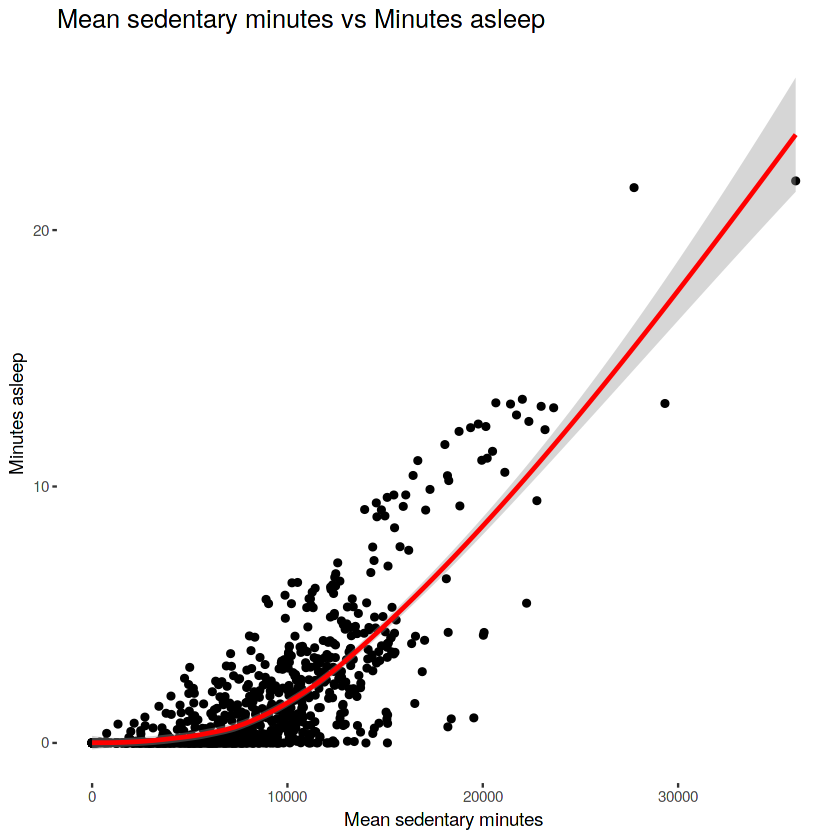

In [4]:
ggplot(activity, aes(x=TotalSteps, y=VeryActiveDistance))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Mean sedentary minutes vs Minutes asleep", x = "Mean sedentary minutes", y= "Minutes asleep") +
  theme(panel.background = element_blank(),
        plot.title = element_text(size=15))

Now that everything is ready, I can start exploring data sets.

# Exploring and summarizing data

This information tells us about number participants in each data sets. 

There is 33 participants in the activity, calories and intensities data sets, 24 in the sleep and only 8 in the weight data set. 8 participants is not significant to make any recommendations and conclusions based on this data.

Let’s have a look at summary statistics of the data sets:

**Some interesting discoveries from this summary:**

* Average sedentary time is 991 minutes or 16 hours. Definately needs to be reduced!

* The majority of the participants are lightly active.

* On the average, participants sleep 1 time for 7 hours.

* Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.

# Merging data

Before beginning to visualize the data, I need to merge two data sets. I’m going to merge (inner join) activity and sleep on columns Id and date (that I previously created after converting data to date time format).

# Visualization

I see positive correlation here between Total Steps and Calories, which is obvious - the more active we are, the more calories we burn.

The relationship between Total Minutes Asleep and Total Time in Bed looks linear. **So if the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.**


Let's look at **intensities data** over time (hourly).

* After visualizing Total Intensity hourly, I found out that people are more active between 5 am and 10pm.

* Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. We can **use this time in the Bellabeat app to remind and motivate users to go for a run or walk.**

Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

* Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

* As an idea: **if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.**

* Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.


# Summarizing recommendations for the business

As we already know, collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

After analyzing FitBit Fitness Tracker Data, I found some **insights that would help influence Bellabeat marketing strategy.**

![](https://images.unsplash.com/photo-1523395294292-1fbf0cd2435e?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=759&q=80)

**Target audience**

Women who work full-time jobs (according to the hourly intensity data) and spend a lot of time at the computer/in a meeting/ focused on work they are doing (according to the sedentary time data).

These women do some light activity to stay healthy (according to the activity type analysis). Even though they need to improve their everyday activity to have health benefits. They might need some knowledge about developing healthy habits or motivation to keep going. 

* As there is no gender information about the participants, I assumed that all genders were presented and balanced in this data set. 

**The key message for the Bellabeat online campaign**

The Bellabeat app is not just another fitness activity app. 
It’s a guide (a friend) who empowers women to balance full personal and professional life and healthy habits and routines by educating and motivating them through daily app recommendations. 

**Ideas for the Bellabeat app**

1. Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can encourage people to take at least 8 000 explaining the benefits for their health.

2. If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can suggest some ideas for low-calorie lunch and dinner.

3. If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed.

4. Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. Bellabeat can use this time to remind and motivate users to go for a run or walk.

5. As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.


**Thank you** for your interest to my Bellabeat Case Study!

This is my first project using R. I would appreciate any comments and recommendations for improvement!
